
#Third Model

#changes

1-->Added 1x1 kernels

2-->Added max pooling to reduce number of params




In [1]:
#loading libraries
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#loading libraries
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
#loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


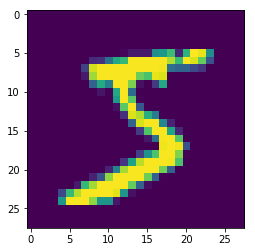

In [4]:
#plotting random image
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#resizing the images to 28x28x1
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#normalizing  the pixles
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [13]:
from keras.layers import Activation,BatchNormalization
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(32, 3, 3, activation='relu')) # 24


model.add(Convolution2D(64, 3, 3, activation='relu')) # 22


model.add(Convolution2D(10, 1, 1, activation='relu')) #
model.add(MaxPooling2D(pool_size=(2, 2))) # 11

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9x9x10



model.add(Convolution2D(32, 3, 3, activation='relu')) # 7


model.add(Convolution2D(64, 3, 3, activation='relu')) # 7


model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packag

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 10)        650       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 10)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 9, 9, 16)          1456      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 32)          4640      
__________

In [0]:
#setting loss function and optimizers , compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [16]:
#fitting the model over train set and also checking the accuracy simultanously
model.fit(X_train, Y_train,validation_data=(X_test, Y_test), batch_size=128, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 192us/step - loss: 0.2322 - acc: 0.9271 - val_loss: 0.0558 - val_acc: 0.9834
Epoch 2/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0569 - acc: 0.9826 - val_loss: 0.0343 - val_acc: 0.9888
Epoch 3/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0393 - acc: 0.9878 - val_loss: 0.0454 - val_acc: 0.9859
Epoch 4/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0327 - acc: 0.9902 - val_loss: 0.0280 - val_acc: 0.9913
Epoch 5/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0264 - acc: 0.9914 - val_loss: 0.0308 - val_acc: 0.9896
Epoch 6/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0218 - acc: 0.9930 - val_loss: 0.0339 - val_acc: 0.9889
Epoch 7/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0184 - acc: 0.9942 - val_loss: 0.

In [17]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03232097475903297, 0.9924]
